In [1]:
import numpy as np
# frequency, in cycles per second, or Hertz
f1 = 2  
f2 = 3# sampling rate, or number of measurements per second
sample_rate = 100
seconds = 10
intervals = seconds * sample_rate# create signal time series data 
t = np.linspace(0, seconds, intervals)
sin1 = np.sin(f1 * 2 * np.pi * t)
sin2 = np.sin(f2 * 2 * np.pi * t)

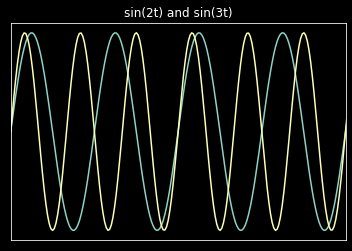

In [2]:
import matplotlib.pyplot as plt
# plot signal
plt.style.use(['dark_background'])
plt.plot(t, sin1)
plt.plot(t, sin2)
plt.xlim(0,2)
plt.title('sin(2t) and sin(3t)')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

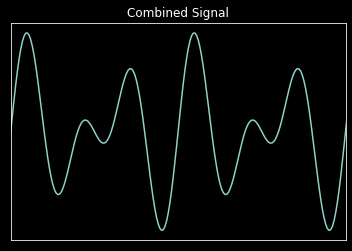

In [3]:
# generate signal
signal = []
for i in range(len(sin1)):
    signal.append(sin1[i] + sin2[i])
    
# plot signal
plt.plot(t, signal)
plt.xlim(0,2)
plt.title('Combined Signal')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

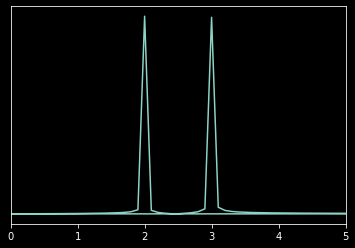

In [4]:
from scipy import fftpack
signal_fft = fftpack.fft(signal)
signal_fft = np.abs(signal_fft)
freqs = fftpack.fftfreq(len(signal)) * sample_rate# plot fft
plt.plot(freqs, signal_fft)
plt.xlim(0,5)
plt.yticks([], [])
plt.show()

----

/tmp/ipykernel_49350/2596049029.py:1: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  im = plt.imread('http://scipy-lectures.org/_downloads/moonlanding.png').astype(float)


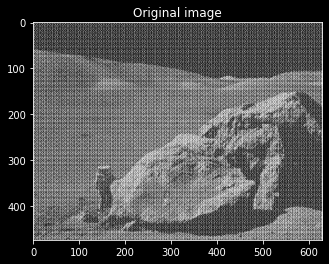

In [5]:
im = plt.imread('http://scipy-lectures.org/_downloads/moonlanding.png').astype(float)
plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')
plt.show()

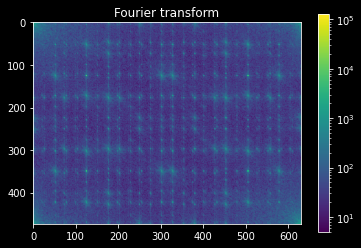

In [6]:
im_fft = fftpack.fft2(im)

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')
plt.show()

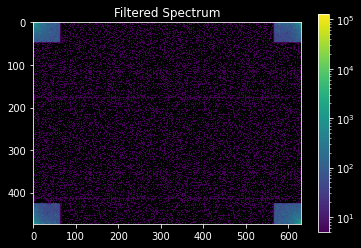

In [7]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')
plt.show()

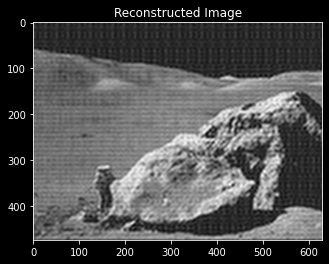

In [8]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')
plt.show()

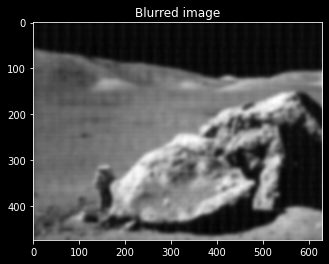

In [9]:
# OR
from scipy import ndimage
im_blur = ndimage.gaussian_filter(im, 4)

plt.figure()
plt.imshow(im_blur, plt.cm.gray)
plt.title('Blurred image')

plt.show()